# ADC Data Acquisition
This script collects and plots ADC data from the GPR

In [1]:
%matplotlib notebook
import serial
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def flipbits(inputbyte):
    return (((inputbyte & 0b00000001) << 7) |
            ((inputbyte & 0b00000010) << 5) |
            ((inputbyte & 0b00000100) << 3) |
            ((inputbyte & 0b00001000) << 1) |
            ((inputbyte & 0b00010000) >> 1) |
            ((inputbyte & 0b00100000) >> 3) |
            ((inputbyte & 0b01000000) >> 5) |
            ((inputbyte & 0b10000000) >> 7)) #go dawgs

In [21]:
#acquire some data
radarport = "COM4"
bsize = 1024
prefix = b'\rDATABUF:'  #don't include the space, do include /r
fs = 200e6

ser = serial.Serial(radarport, 115200)
captured = False
adcdata = np.zeros(bsize)
while not captured:
    data = ser.readline()
    if(data.split(b' ')[0] == prefix):
        print(data)
        databytes = data.split(b' ')[1].decode('utf-8')
        adcdata = np.array([int(i) for i in databytes.split(',')[:-1]])
        captured = True

ser.close()
print(adcdata)

[67 67 67 ... 63 63 62]


In [18]:
ser.close()
print(len(adcdata))

1024


[0.000e+00 5.000e-09 1.000e-08 ... 5.105e-06 5.110e-06 5.115e-06]


<IPython.core.display.Javascript object>


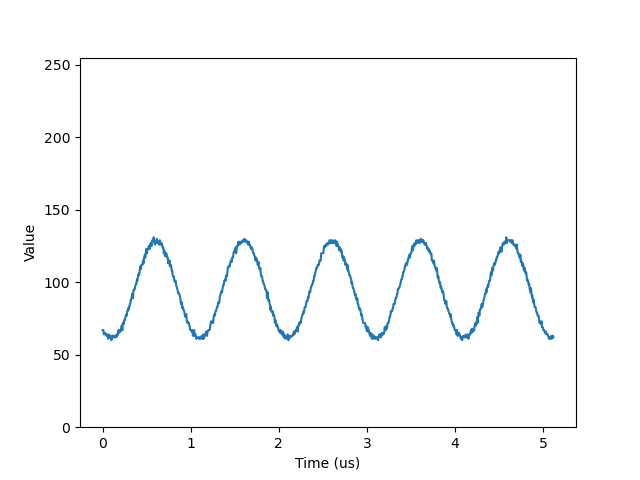

In [22]:
t = np.arange(0,bsize/fs,1/fs)
print(t)
fig1 = plt.figure()
plt.plot(t*1e6,adcdata)
axes = plt.gca()
axes.set_ylim(0,255)
plt.xlabel("Time (us)")
plt.ylabel("Value")
plt.show()